##### * Importing some useful libraries

In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix
import os
import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

* **Did some surfing and found some websites offering malicious links.** And found some datasets

In [2]:
phishing_data1 = pd.read_csv(r"C:\Users\Aadi\Downloads\urldata.csv")
phishing_data1.columns = ['URL','Label']
phishing_data2 = pd.read_csv(r"C:\Users\Aadi\Downloads\phishing_site_urls.csv")
phishing_data2.columns = ['URL','Label']

* **Concatenate All datasets in one.**

In [3]:
frames = [phishing_data1, phishing_data2]
phishing_urls = pd.concat(frames)

In [4]:
#saving dataset
phishing_urls.to_csv(r'phishing_urls.csv', index = False)

* **Loading the main dataset.**

In [5]:
phish_data = pd.read_csv('phishing_urls.csv')

#### * You can download dataset from my **Kaggle** Profile <a href='https://www.kaggle.com/taruntiwarihp/phishing-site-urls'>here</a>

In [6]:
phish_data.head()

,URL,Label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [7]:
phish_data.tail()

,URL,Label
969805,23.227.196.215/,bad
969806,apple-checker.org/,bad
969807,apple-iclods.org/,bad
969808,apple-uptoday.org/,bad
969809,apple-search.info,bad


In [8]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969810 entries, 0 to 969809
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     969810 non-null  object
 1   Label   969810 non-null  object
dtypes: object(2)
memory usage: 14.8+ MB


In [9]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

In [10]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

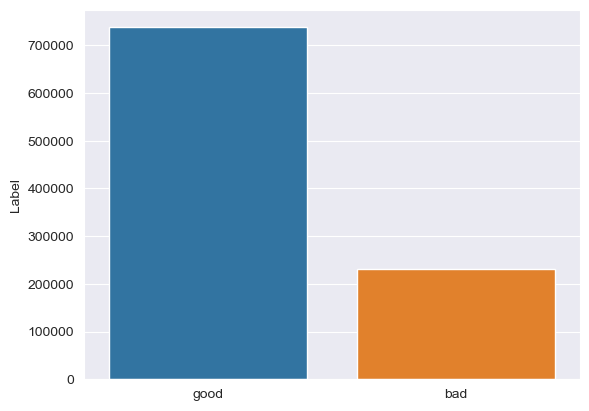

In [11]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [12]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [13]:
phish_data.URL[0]

'diaryofagameaddict.com'

In [14]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['diaryofagameaddict', 'com']

In [15]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 4.1764948 sec


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized
699666,andyhardyfilms.com/ahdl.htm,good,"[andyhardyfilms, com, ahdl, htm]"
699997,animationinsider.net/article.php?articleID=2824,good,"[animationinsider, net, article, php, articleID]"
68453,desmoines.craigslist.org/gms/2697555625.html,good,"[desmoines, craigslist, org, gms, html]"
619496,iarchives.nysed.gov/Directories/directories.js...,good,"[iarchives, nysed, gov, Directories, directori..."
505935,www.eecg.utoronto.ca/cgi-bin/cgiwrap/chanb/ind...,good,"[www, eecg, utoronto, ca, cgi, bin, cgiwrap, c..."


In [17]:
stemmer = SnowballStemmer("english") # choose a language

In [18]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 66.6979741 sec


In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
280929,linkedin.com/pub/eric-lamaze/14/573/187,good,"[linkedin, com, pub, eric, lamaze]","[linkedin, com, pub, eric, lamaz]"
558731,kf25zx.com/images/?ref=http%3A%2F%2Fuivaywyus....,bad,"[kf, zx, com, images, ref, http, A, F, Fuivayw...","[kf, zx, com, imag, ref, http, a, f, fuivaywyu..."
774328,homesandlandofmontreal-tremblant.com/Homes_For...,good,"[homesandlandofmontreal, tremblant, com, Homes...","[homesandlandofmontr, tremblant, com, home, fo..."
502169,wbond.net/sublime_packages,good,"[wbond, net, sublime, packages]","[wbond, net, sublim, packag]"
238139,famouswhy.com/List/c/African_American_dramatis...,good,"[famouswhy, com, List, c, African, American, d...","[famouswhi, com, list, c, african, american, d..."


In [20]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.3695923000000221 sec


In [21]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
870933,transnationale.org/companies/bombardier.php,good,"[transnationale, org, companies, bombardier, php]","[transnational, org, compani, bombardi, php]",transnational org compani bombardi php
847257,salon.com/2010/07/08/kids_are_all_right_2/,good,"[salon, com, kids, are, all, right]","[salon, com, kid, are, all, right]",salon com kid are all right
149680,tennessee.rivals.com/viewcoach.asp?coach=365&s...,good,"[tennessee, rivals, com, viewcoach, asp, coach...","[tennesse, rival, com, viewcoach, asp, coach, ...",tennesse rival com viewcoach asp coach sport year
595481,en.wikipedia.org/wiki/George_Fernandes,good,"[en, wikipedia, org, wiki, George, Fernandes]","[en, wikipedia, org, wiki, georg, fernand]",en wikipedia org wiki georg fernand
443167,zywalls.co.uk/pictures/originals/service-JUGT9...,bad,"[zywalls, co, uk, pictures, originals, service...","[zywal, co, uk, pictur, origin, servic, jugt, ...",zywal co uk pictur origin servic jugt pbs kjgh...


### Visualization 
**1. Visualize some important keys using word cloud**

In [22]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [23]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,diaryofagameaddict.com,bad,"[diaryofagameaddict, com]","[diaryofagameaddict, com]",diaryofagameaddict com
1,espdesign.com.au,bad,"[espdesign, com, au]","[espdesign, com, au]",espdesign com au
2,iamagameaddict.com,bad,"[iamagameaddict, com]","[iamagameaddict, com]",iamagameaddict com
3,kalantzis.net,bad,"[kalantzis, net]","[kalantzi, net]",kalantzi net
4,slightlyoffcenter.net,bad,"[slightlyoffcenter, net]","[slightlyoffcent, net]",slightlyoffcent net


In [24]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
42767,01453.com/,good,[com],[com],com
42768,015fb31.netsolhost.com/bosstweed.html,good,"[fb, netsolhost, com, bosstweed, html]","[fb, netsolhost, com, bosstwe, html]",fb netsolhost com bosstwe html
42769,02bee66.netsolhost.com/lincolnhomepage/,good,"[bee, netsolhost, com, lincolnhomepage]","[bee, netsolhost, com, lincolnhomepag]",bee netsolhost com lincolnhomepag
42770,02ec0a3.netsolhost.com/getperson.php?personID=...,good,"[ec, a, netsolhost, com, getperson, php, perso...","[ec, a, netsolhost, com, getperson, php, perso...",ec a netsolhost com getperson php personid i t...
42771,032255.com/,good,[com],[com],com


* create a function to visualize the important keys from url 

In [25]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [26]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

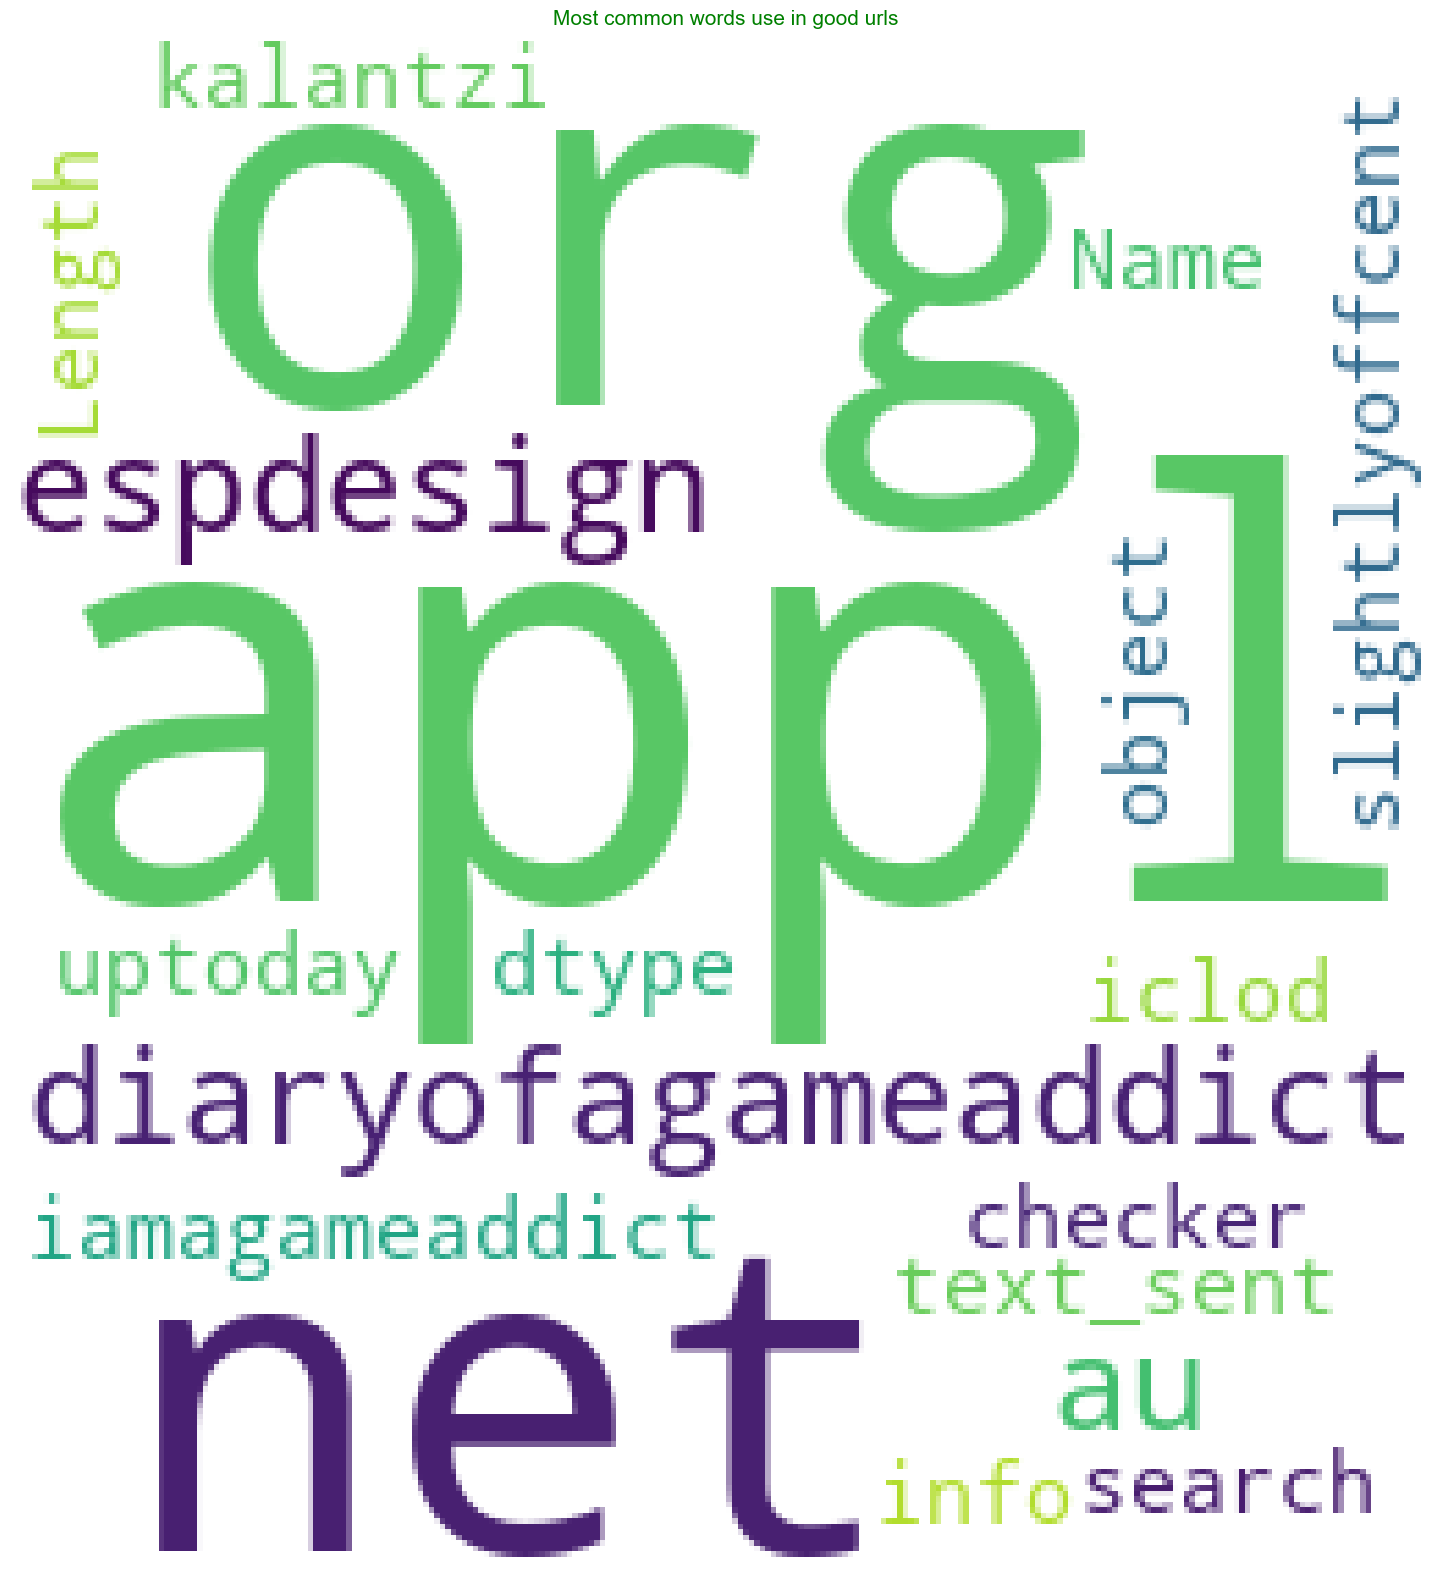

In [90]:
common_text = str(data)
common_mask = np.array(Image.open('C:/Users/Aadi/Downloads/green-check-mark-icon-tick-260nw-522874111-removebg-preview.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [28]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

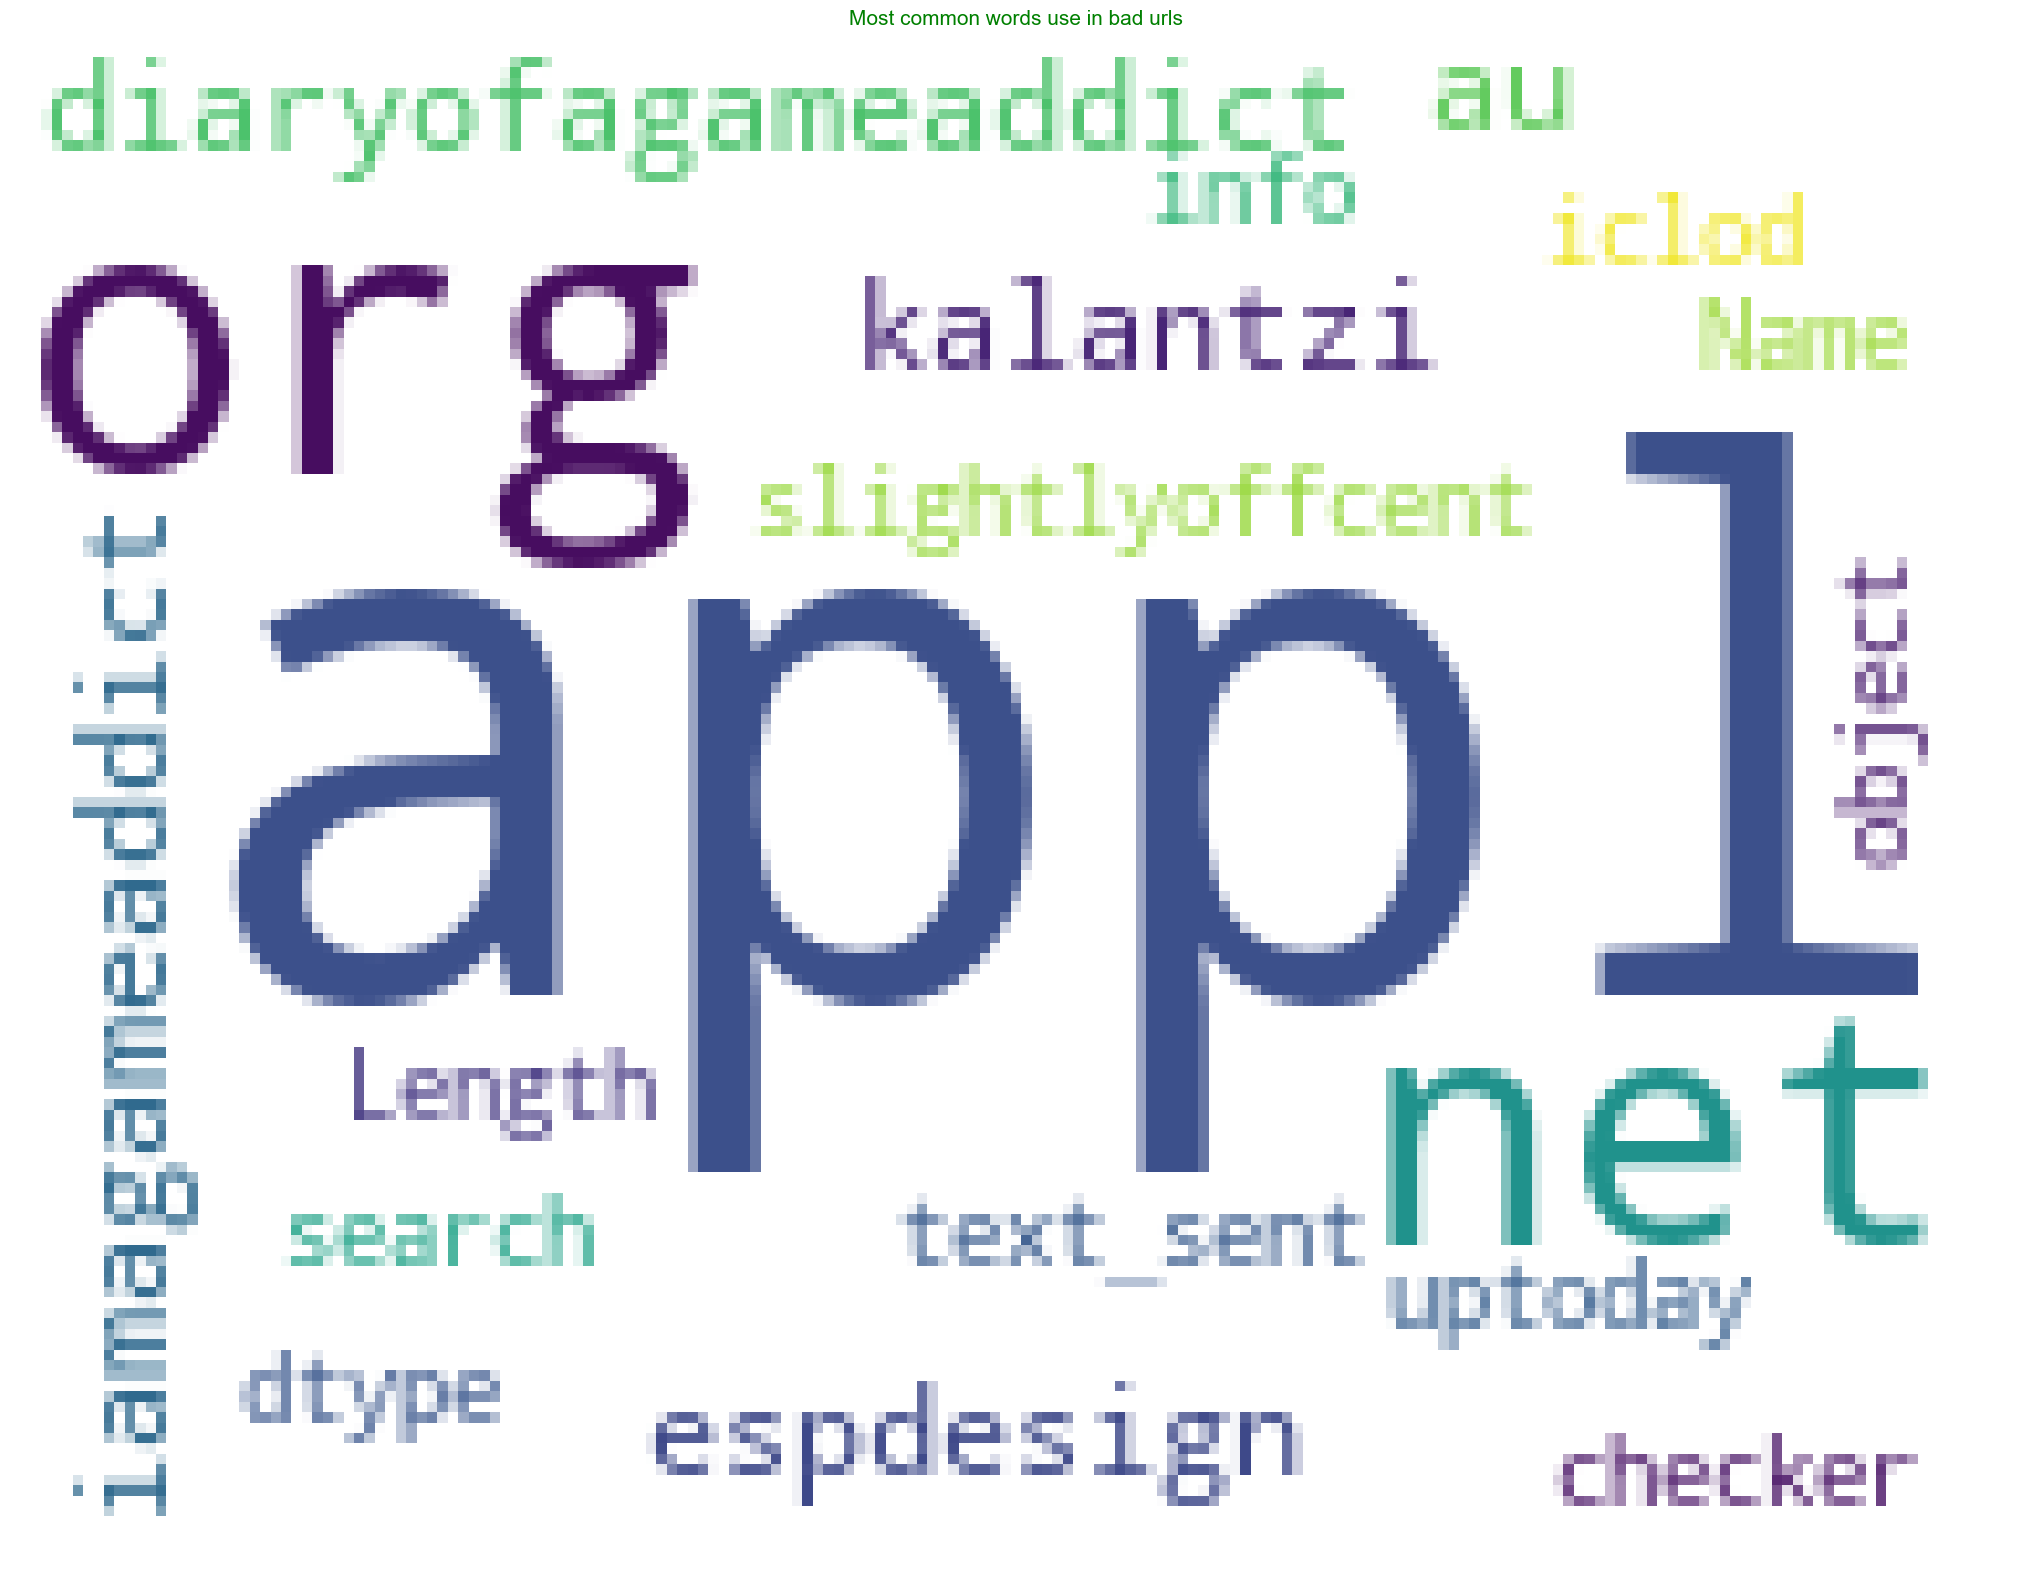

In [29]:
common_text = str(data)
common_mask = np.array(Image.open('C:/Users/Aadi/Downloads/download__1_-removebg-preview.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

Download more various type of images <a href='https://github.com/taruntiwarihp/raw_images/tree/master/Words%20cloud%20images'>here</a>

**2. Visualize internal links, it will shows all redirect links.** 

#### Scrape any website
* First, setting up the Chrome webdriver so we can scrape dynamic web pages.

#### Chrome webdriver
* WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [34]:
browser = webdriver.Chrome()

**You can download chromedriver.exe from my github <a href='https://github.com/taruntiwarihp/dataSets/blob/master/chromedriver_win32.zip'>here</a>**

* After set up the Chrome driver create two lists.
* First list named list_urls holds all the pages you’d like to scrape.
* Second, create an empty list where you’ll append links from each page.


In [50]:
list_urls = ['https://katmoviehd.foo/','https://katmoviehd.foo/contact-us/'] #here i take phishing sites 
links_with_text = []

* I took some phishing site to see were the hackers redirect(on different link) us.
* Use the BeautifulSoup library to extract only relevant hyperlinks for Google, i.e. links only with '<'a'>' tags with href attributes. 

#### BeautifulSoup
* It is use for getting data out of HTML, XML, and other markup languages. 

In [51]:

for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

#### Turn the URL’s into a Dataframe
* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [52]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [53]:
df.head()

,from,to
0,https://katmoviehd.foo/,https://katmovie18.net
1,https://katmoviehd.foo/,https://katdrama.com/
2,https://katmoviehd.foo/,https://pikahd.com/category/anime-hindi-dubbed/
3,https://katmoviehd.foo/,#mm-1
4,https://katmoviehd.foo/,https://katmoviehd.foo/category/hollywood-eng/


#### Step 3: Draw a graph
* Finally, use the aforementioned DataFrame to **visualize an internal link structure by feeding it to the Networkx method from_pandas_edgelist first** and draw it by calling nx.draw

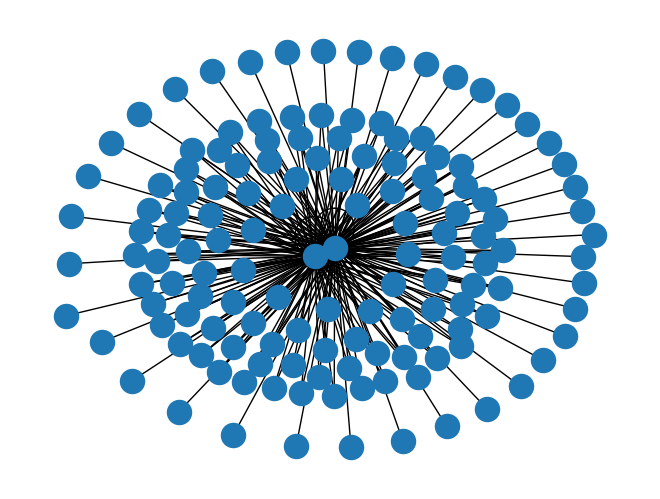

In [54]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA, with_labels=False)

### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [55]:
#create cv object
cv = CountVectorizer()

In [56]:
#help(CountVectorizer())

In [57]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [58]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### * Spliting the data 

In [59]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [60]:
# create lr object
lr = LogisticRegression()

In [61]:
lr.fit(trainX,trainY)

LogisticRegression()

In [62]:
lr.score(testX,testY)

0.9749064767191992

In [63]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.983576153113258
Testing Accuracy : 0.9749064767191992

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.95     54595
        Good       0.99      0.98      0.98    187858

    accuracy                           0.97    242453
   macro avg       0.96      0.97      0.96    242453
weighted avg       0.98      0.97      0.98    242453


CONFUSION MATRIX


<AxesSubplot:>

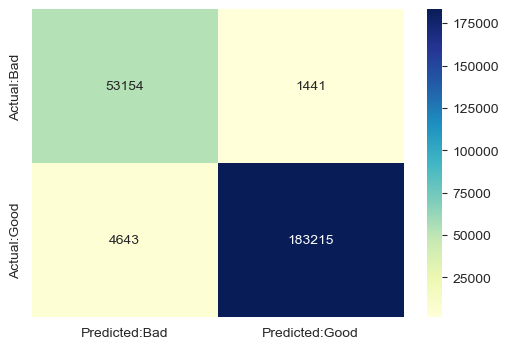

In [64]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [65]:
# create mnb object
mnb = MultinomialNB()

In [66]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [67]:
mnb.score(testX,testY)

0.9710706817403786

In [68]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.979488751740892
Testing Accuracy : 0.9710706817403786

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.94      0.94      0.94     57405
        Good       0.98      0.98      0.98    185048

    accuracy                           0.97    242453
   macro avg       0.96      0.96      0.96    242453
weighted avg       0.97      0.97      0.97    242453


CONFUSION MATRIX


<AxesSubplot:>

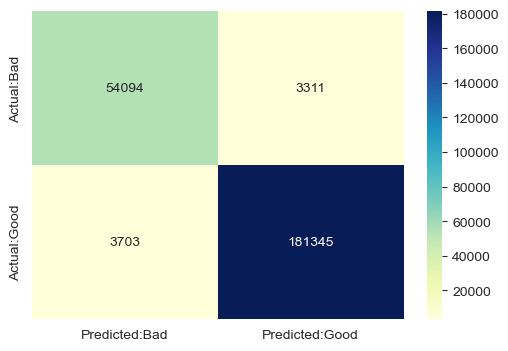

In [69]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<AxesSubplot:ylabel='Accuracy'>

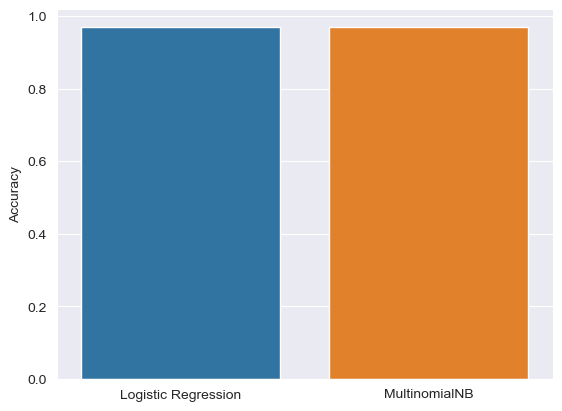

In [70]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [71]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [72]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [73]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [74]:
pipeline_ls.score(testX,testY) 

0.9776987704833514

Training Accuracy : 0.9866736691885828
Testing Accuracy : 0.9776987704833514

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.98      0.95     55383
        Good       0.99      0.98      0.99    187070

    accuracy                           0.98    242453
   macro avg       0.96      0.98      0.97    242453
weighted avg       0.98      0.98      0.98    242453


CONFUSION MATRIX


<AxesSubplot:>

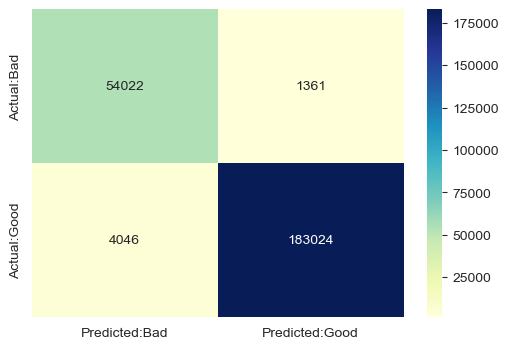

In [75]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [76]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [77]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9776987704833514


***That’s it. See, it's that simple yet so effective. We get an accuracy of 98%. That’s a very high value for a machine to be able to detect a malicious URL with. Want to test some links to see if the model gives good predictions? Sure. Let's do it**

In [85]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
